In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [82]:
df = pd.read_csv('vgsales.csv')

In [83]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [88]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [89]:
# drop null values
df.dropna(inplace=True)

In [90]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [106]:
#### EDA ####

def check_df(df, head=5):
    print('### Shape ###')
    print(df.shape)
    print('### Types ###')
    print(df.dtypes)
    print('### Head ###')
    print(df.head(head))
    print('### Tail ###')
    print(df.tail(head))
    print('### NA ###')
    print(df.isnull().sum())
    #print('### Quantiles ###')
    #print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [107]:
check_df(df)

### Shape ###
(16291, 11)
### Types ###
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
### Head ###
   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  

In [109]:
### Categorical Variables ###

def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        'Ratio': 100 * df[col_name].value_counts() / len(df)}))
    print('##########################################')
    if plot:
        plt.xticks(rotation=90)
        sns.countplot(x=df[col_name], data=df)
        plt.show(block=True)

          Platform      Ratio
Platform                     
DS            2131  13.080842
PS2           2127  13.056289
PS3           1304   8.004420
Wii           1290   7.918483
X360          1234   7.574735
PSP           1197   7.347615
PS            1189   7.298508
PC             938   5.757780
XB             803   4.929102
GBA            786   4.824750
GC             542   3.326990
3DS            499   3.063041
PSV            410   2.516727
PS4            336   2.062488
N64            316   1.939721
SNES           239   1.467068
XOne           213   1.307470
SAT            173   1.061936
WiiU           143   0.877785
2600           116   0.712050
NES             98   0.601559
GB              97   0.595421
DC              52   0.319195
GEN             27   0.165736
NG              12   0.073660
SCD              6   0.036830
WS               6   0.036830
3DO              3   0.018415
TG16             2   0.012277
GG               1   0.006138
PCFX             1   0.006138
##########

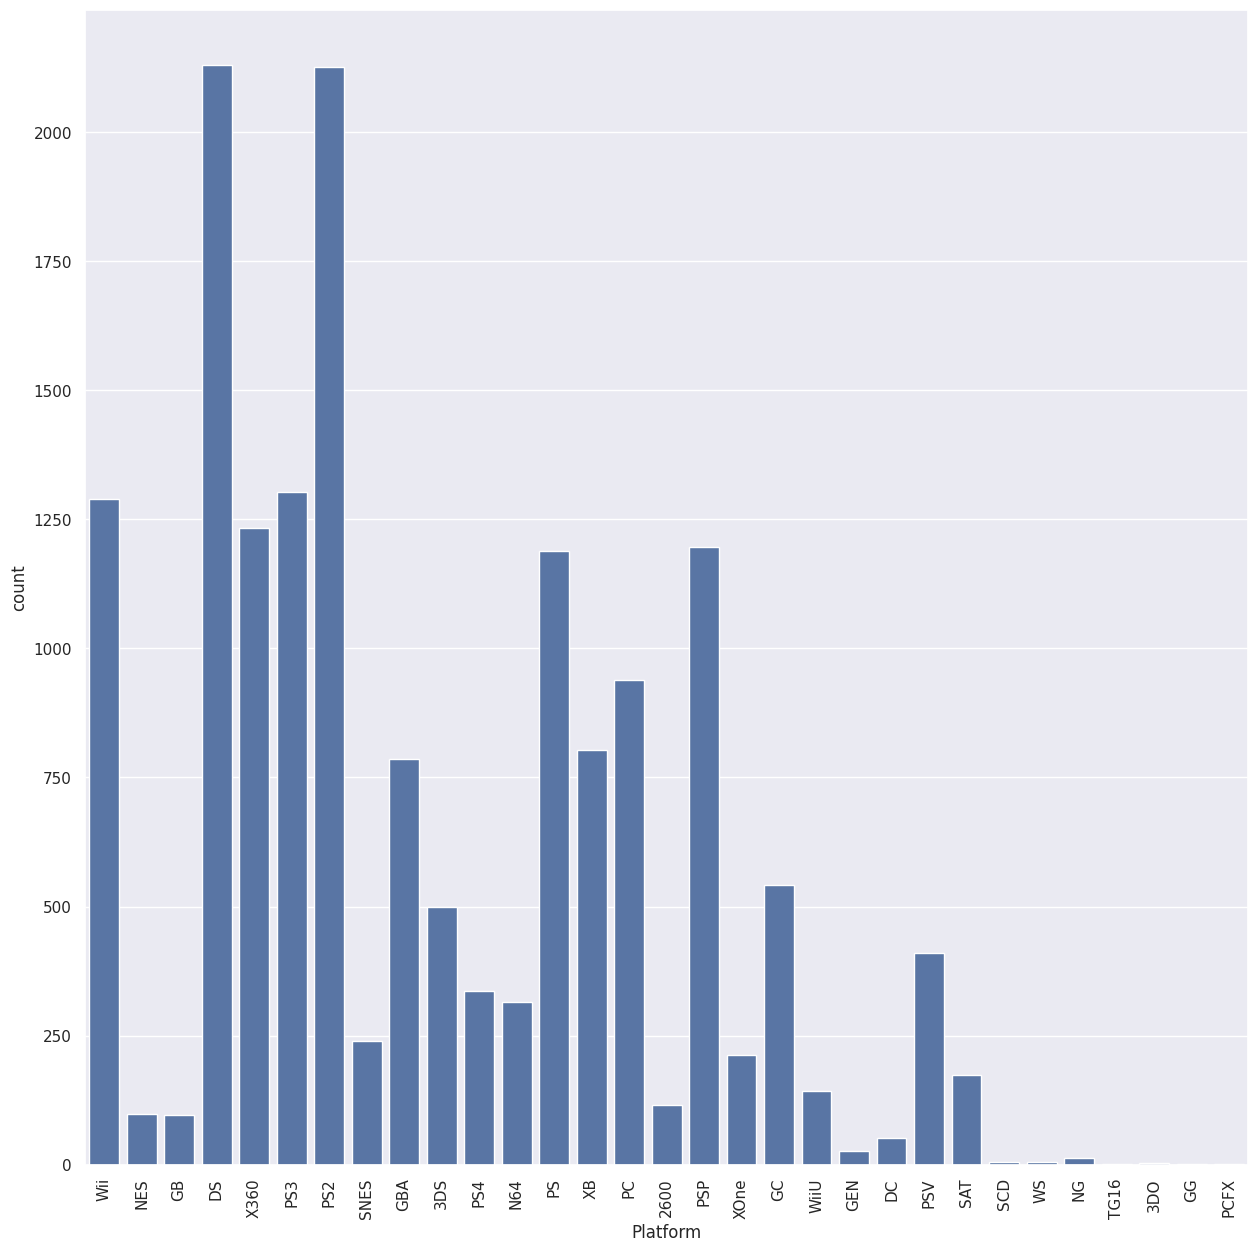

In [110]:
cat_summary(df, 'Platform', plot=True)

In [96]:
### Numerical Variables ###

def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99]
    print(df[numerical_col].describe(quantiles).T)
    print('##########################################')
    if plot:
        sns.histplot(df[numerical_col], bins=20)
        plt.show(block=True)

count    16291.000000
mean         0.147731
std          0.509303
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.010000
50%          0.020000
60%          0.040000
70%          0.080000
80%          0.160000
90%          0.360000
99%          1.940000
max         29.020000
Name: EU_Sales, dtype: float64
##########################################


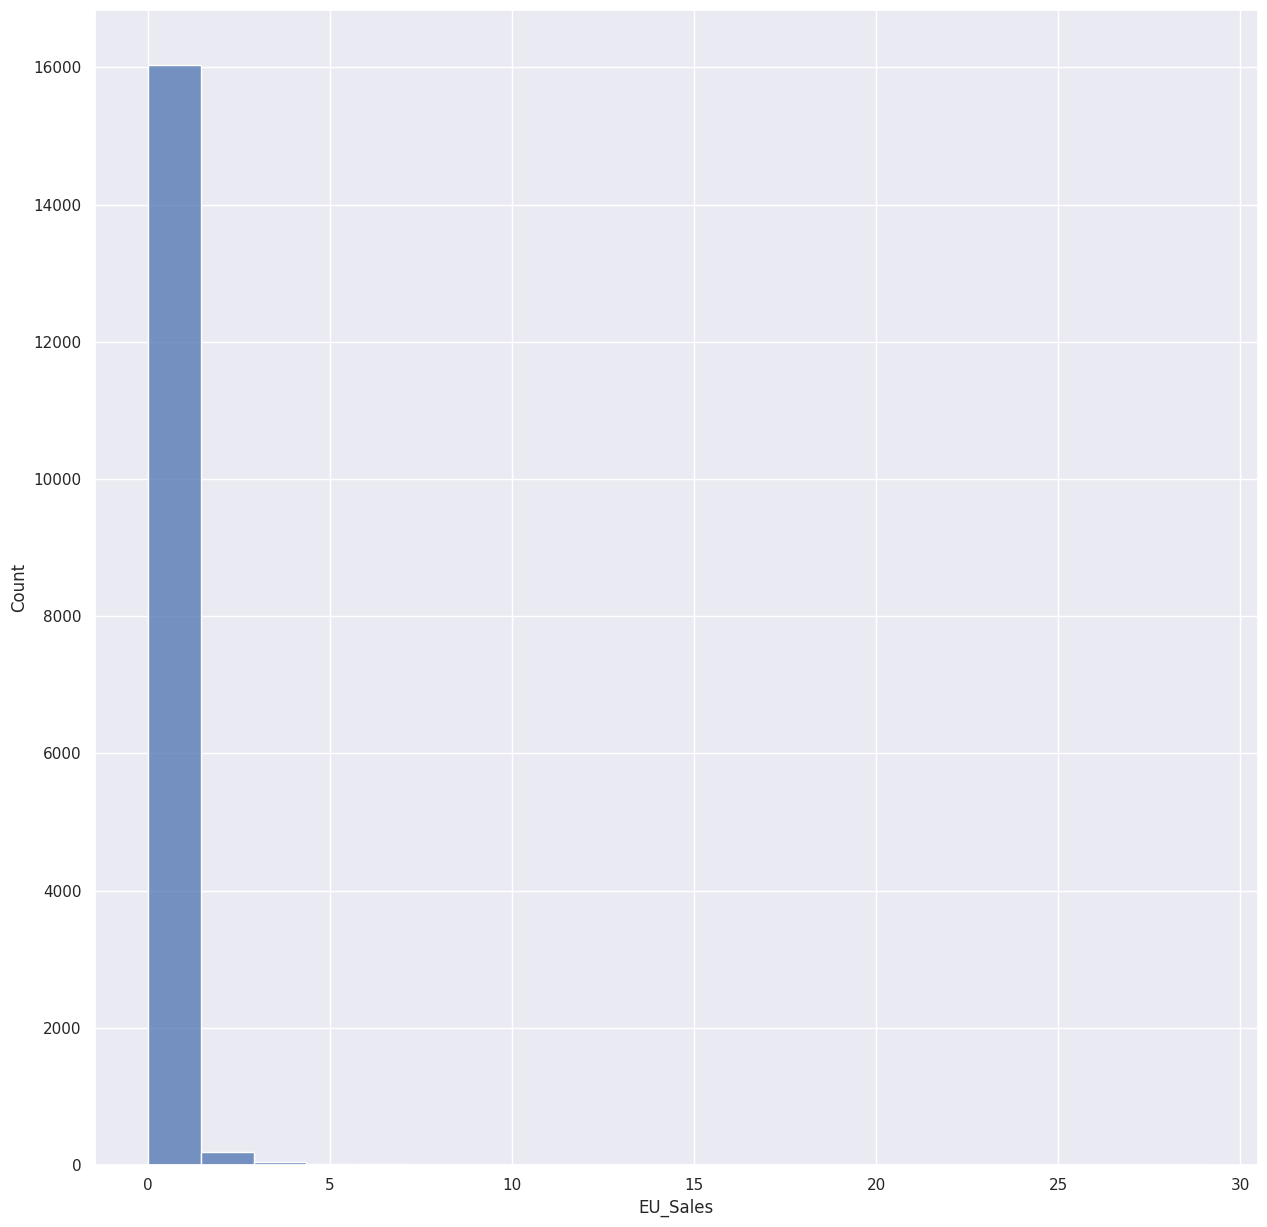

In [97]:
num_summary(df, 'EU_Sales', plot=True)

In [98]:
### Target Variables ###

def target_summary_with_cat(df, target, categorical_col):
    print(df.groupby(categorical_col)[target].mean())
    # alternative: df.groupby(categorical_col).agg({target: 'mean'}
    print('##########################################')
    sns.barplot(x=categorical_col, y=target, data=df)
    plt.show(block=True)

Platform
2600    0.746293
3DO     0.033333
3DS     0.493527
DC      0.307115
DS      0.384284
GB      2.622887
GBA     0.388830
GC      0.363727
GEN     1.050370
GG      0.040000
N64     0.690538
NES     2.561939
NG      0.120000
PC      0.271535
PCFX    0.030000
PS      0.611766
PS2     0.579906
PS3     0.728029
PS4     0.827679
PSP     0.243701
PSV     0.150244
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.705279
WiiU    0.572448
X360    0.785737
XB      0.313935
XOne    0.662254
Name: Global_Sales, dtype: float64
##########################################


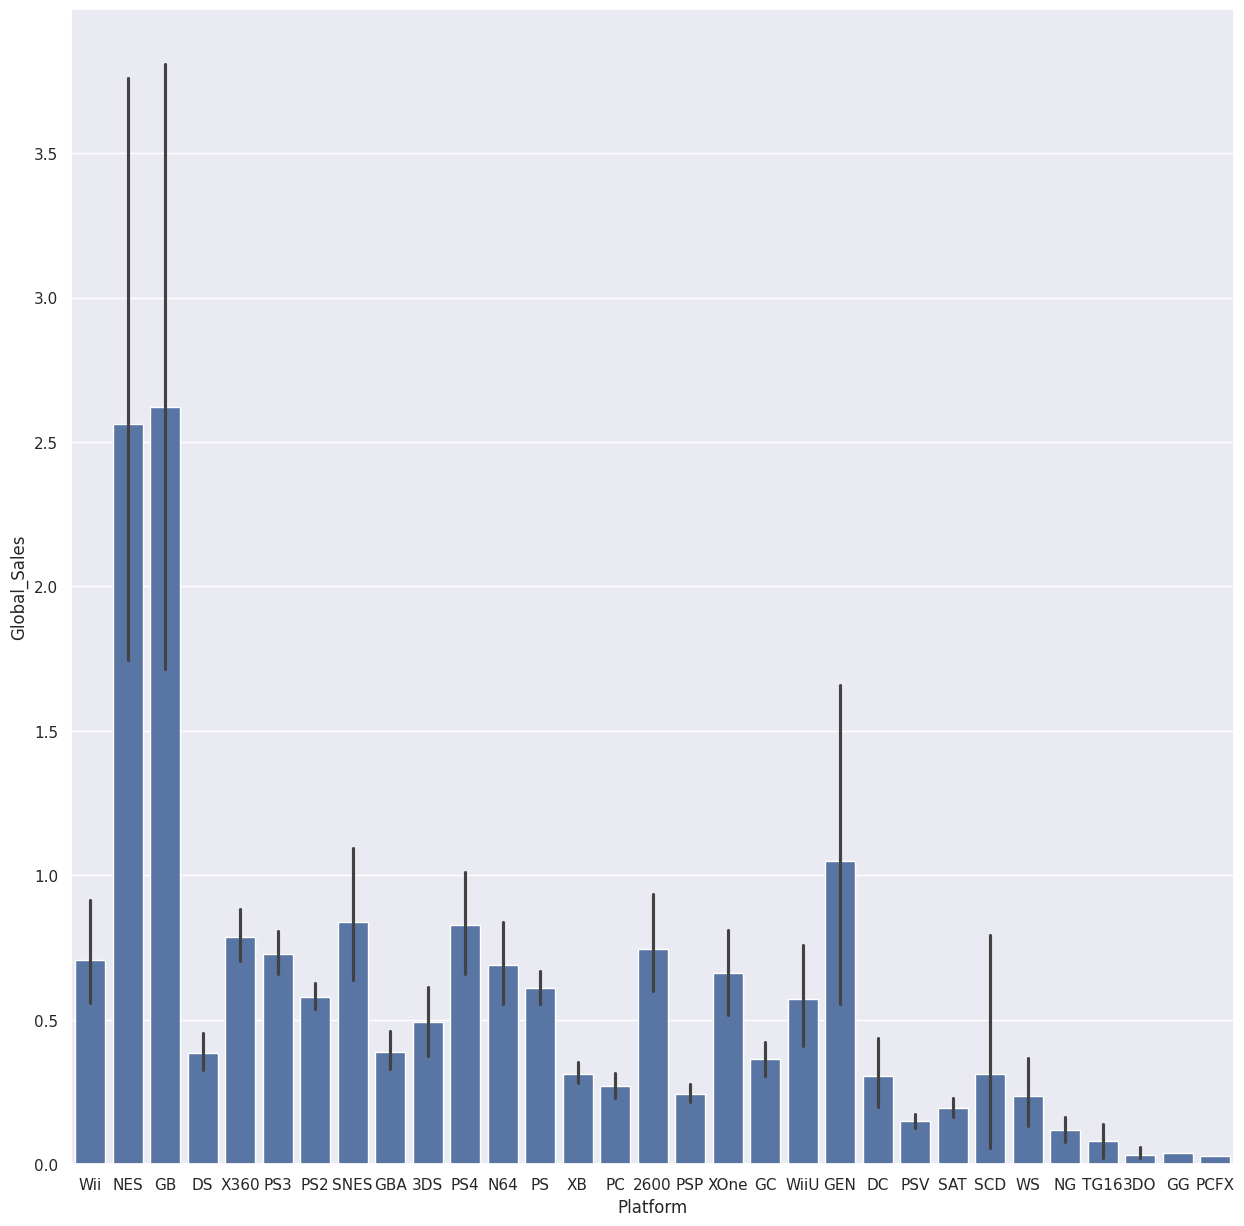

In [99]:
target_summary_with_cat(df, 'Global_Sales', 'Platform')

In [100]:
### Correlation ###

num_cols = [col for col in df.columns if df[col].dtype in [int, float] and col not in 'Year']

In [101]:
num_cols

['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

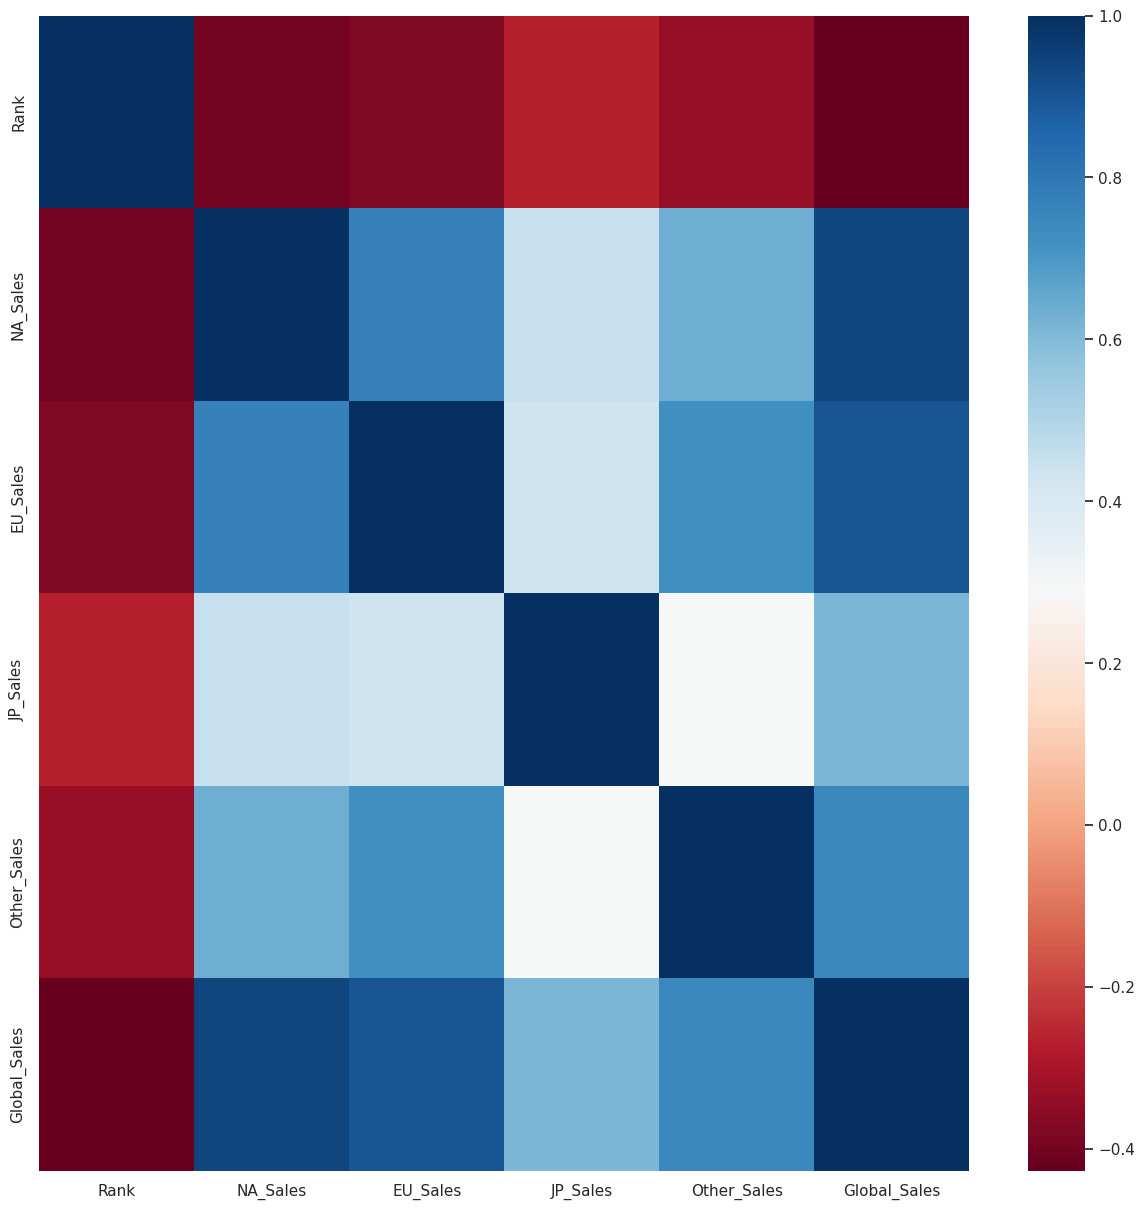

In [102]:
corr = df[num_cols].corr()
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, cmap='RdBu')
plt.show()

In [103]:
corr

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
NA_Sales,-0.400315,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,0.941269,0.903264,0.612774,0.747964,1.000000


In [104]:
def grab_col_names(xdf,xcat_th = 10 , xcar_th = 20):
    cat_cols = [col for col in xdf.columns if xdf[col].dtypes in ["bool", "object", "category"]]
    num_but_cat = [col for col in xdf.columns if xdf[col].dtypes in ["int64", "float64"]
                   and xdf[col].nunique() < xcat_th]
    cat_but_car = [col for col in xdf.columns if xdf[col].dtypes in ["object", "category"]
                   and xdf[col].nunique() > xcar_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in xdf.columns if str(xdf[col].dtypes) in ["float64","int64"]
                and col not in cat_cols]

    print(f"Observations : {xdf.shape[0]}")
    print(f"Variables : {xdf.shape[1]}")
    print(f"Cat_cols : {len(cat_cols)}")
    print(f"Num_cols : {len(num_cols)}")
    print(f"Cat_But_car : {len(cat_but_car)}")
    print(f"Num_but-cat : {len(num_but_cat)}")
    print(f"Categoric Variables : {cat_cols}")
    print(f"Numeric Variables :  {num_cols}")
    
    return cat_cols, num_cols, cat_but_car

In [105]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations : 16291
Variables : 11
Cat_cols : 1
Num_cols : 7
Cat_But_car : 3
Num_but-cat : 0
Categoric Variables : ['Genre']
Numeric Variables :  ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
